<a href="https://colab.research.google.com/github/JeelCueva/modelos-arch-garch/blob/main/Practica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. CARGAR LAS LIBRERIAS NECESARIAS

In [18]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# ### 1. CARGAR BASE DE DATOS DESDE DRIVE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


### Cargar Base de Datos desde Drive

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/CreditRisk.csv')
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,8.46
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,16.58
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,29.85
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,13.25
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,9.10


# Realizar con el dataset CreditRisk.csv, las siguientes fases de entrenamiento de un modelo de credit scoring:
* Analisis Exploratorio de variables
* Ingenieria de Características/variables
* Selección de Características/variables
* Modelo Logístico


# 1. Análisis Exploratorio de Variables (EDA)
* Cargamos los datos, revisamos las primeras filas, valores faltantes y visualizamos la distribución de variables numéricas y categóricas.

    status  seniority   home  time  age  marital records        job  expenses  \
0       ok          9   rent    60   30  married      no  freelance        73   
1       ok         17   rent    60   58    widow      no      fixed        48   
2  default         10  owner    36   46  married     yes  freelance        90   
3       ok          0   rent    60   24   single      no      fixed        63   
4       ok          0   rent    36   26   single      no      fixed        46   

   income  assets  debt  amount  price  
0     129       0     0     800   8.46  
1     131       0     0    1000  16.58  
2     200    3000     0    2000  29.85  
3     182    2500     0     900  13.25  
4     107       0     0     310   9.10  
status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64


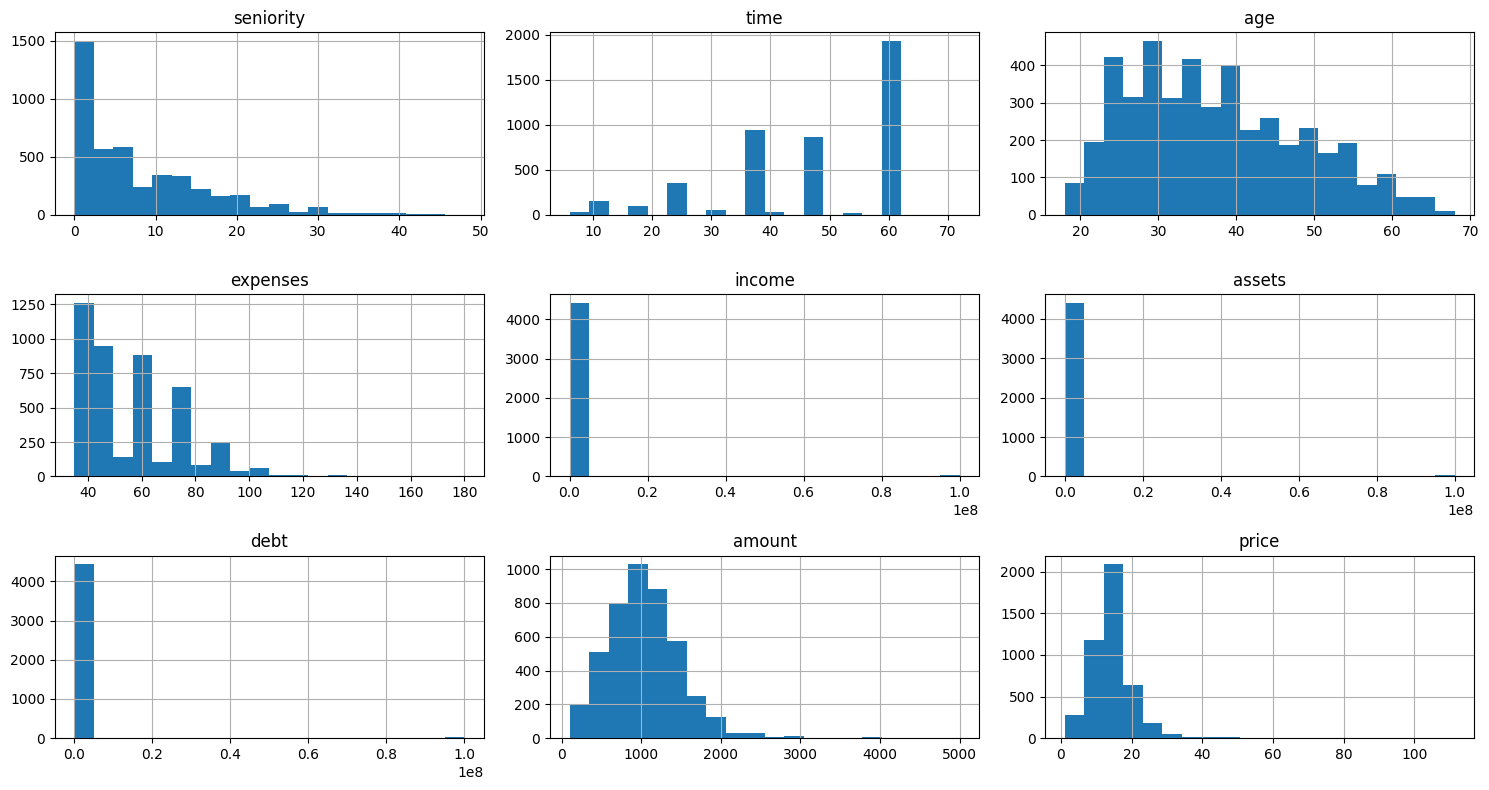

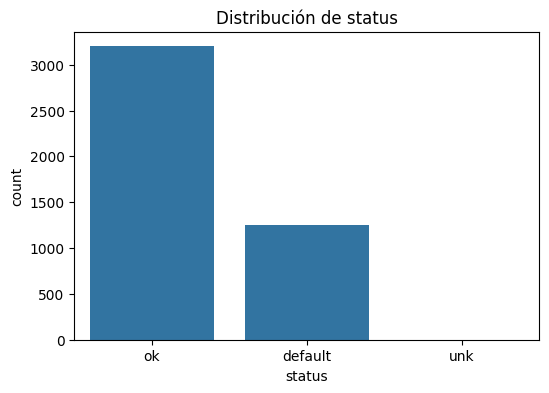

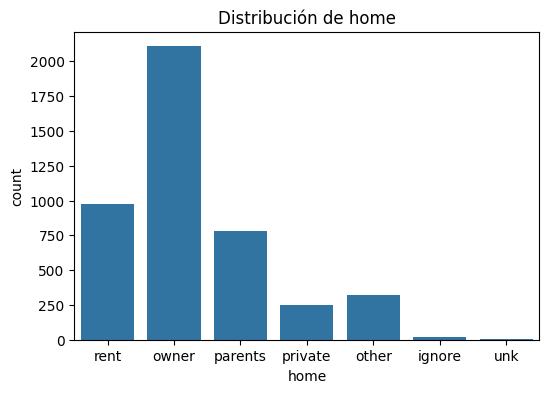

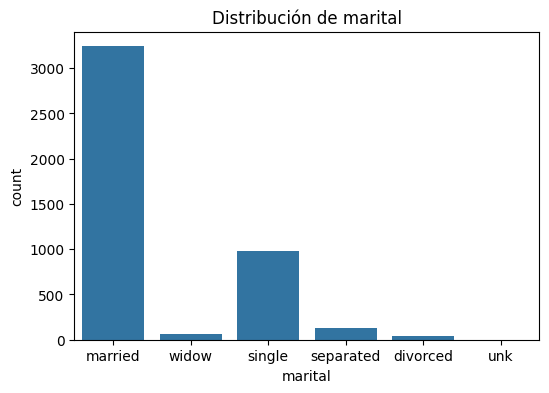

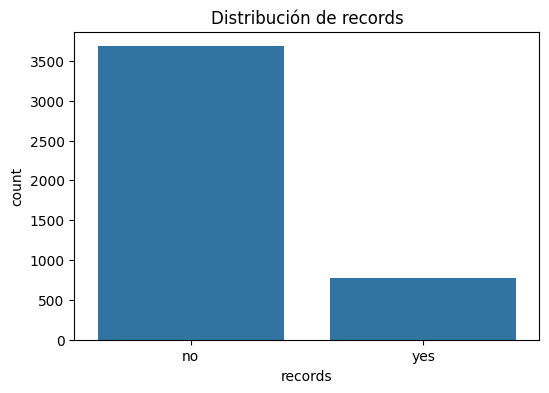

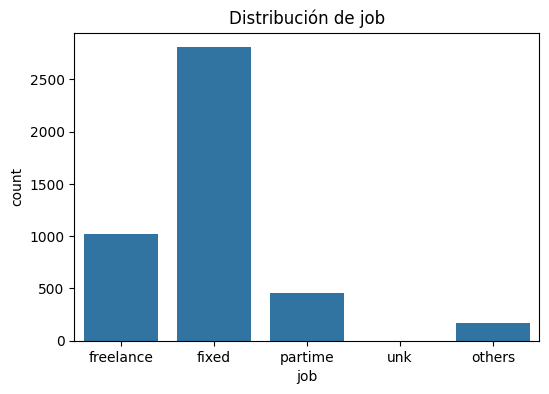

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('CreditRisk.csv', encoding='ascii')

# Primeras filas y valores faltantes
print(df.head())
print(df.isnull().sum())

# Distribución de variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(bins=20, figsize=(15, 8))
plt.tight_layout()
plt.show()

# Distribución de variables categóricas
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title('Distribución de ' + col)
    plt.show()

# 2. Ingeniería de Características
* Transformamos la variable objetivo y codificamos las variables categóricas.

In [26]:
from sklearn.preprocessing import LabelEncoder

# Copia del dataframe
df_model = df.copy()

# Codificar variable objetivo: 'status' (ok=0, default=1)
df_model['status'] = df_model['status'].map({'ok': 0, 'default': 1})

# Codificar variables categóricas
cat_cols = ['home', 'marital', 'records', 'job']
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

print(df_model.head())

   status  seniority  home  time  age  marital  records  job  expenses  \
0     0.0          9     5    60   30        1        0    1        73   
1     0.0         17     5    60   58        5        0    0        48   
2     1.0         10     2    36   46        1        1    1        90   
3     0.0          0     5    60   24        3        0    0        63   
4     0.0          0     5    36   26        3        0    0        46   

   income  assets  debt  amount  price  
0     129       0     0     800   8.46  
1     131       0     0    1000  16.58  
2     200    3000     0    2000  29.85  
3     182    2500     0     900  13.25  
4     107       0     0     310   9.10  


# 3. Selección de Características y Entrenamiento del Modelo
* Seleccionamos variables relevantes, limpiamos datos faltantes y entrenamos el modelo logístico.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Selección de variables
features = ['seniority', 'home', 'time', 'age', 'marital', 'records', 'job', 'expenses', 'income', 'assets', 'debt', 'amount']

# Eliminar filas con valores faltantes
clean_df = df_model.dropna(subset=['status'] + features)

# División en train/test
X = clean_df[features]
y = clean_df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenamiento del modelo logístico
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 4. Evaluación del Modelo y Métricas
Calculamos ROC-AUC, GINI, seleccionamos el umbral óptimo y mostramos métricas de clasificación.



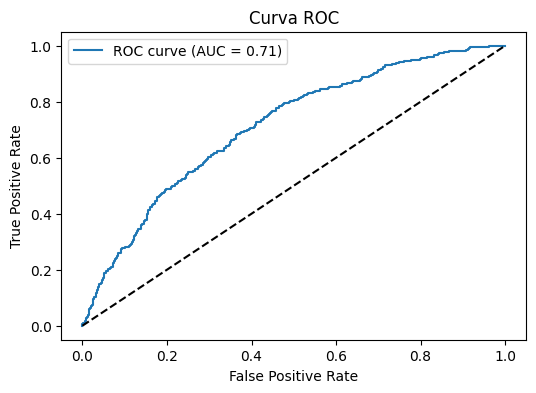

    ROC-AUC      GINI  Optimal Threshold  Precision    Recall  F1 Score
0  0.711011  0.422023           0.287884   0.398111  0.784574  0.528201


In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_fscore_support, precision_recall_curve
import numpy as np

# Predicciones de probabilidad
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# ROC-AUC y GINI
roc_auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * roc_auc - 1

# Curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Umbral óptimo por F1 Score
prec, rec, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]

# Predicciones finales
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Métricas de clasificación
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_optimal, average='binary')

# Resultados
results = pd.DataFrame({
    'ROC-AUC': [roc_auc],
    'GINI': [gini],
    'Optimal Threshold': [optimal_threshold],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]
})
print(results)

# 5. Importancia de Variables y Visualizaciones Clave
* Mostramos la importancia de las variables, la distribución de probabilidades y la matriz de confusión.



/tmp/ipython-input-29-2336435683.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia (coeficiente)', y='Variable', data=feature_importance, palette='viridis')


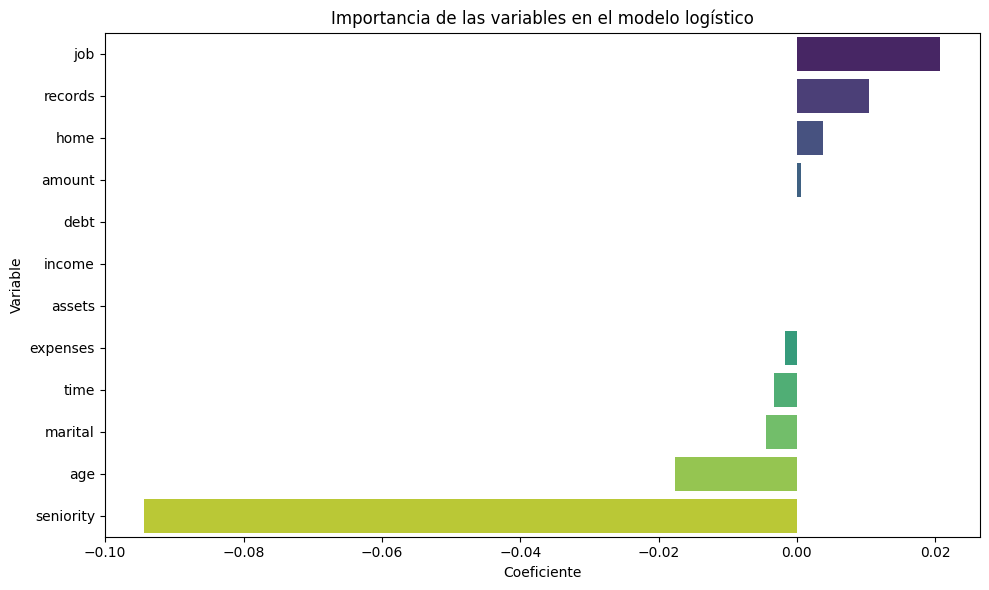

     Variable  Importancia (coeficiente)
6         job               2.072323e-02
5     records               1.037133e-02
1        home               3.716351e-03
11     amount               5.430100e-04
10       debt               2.034728e-08
8      income               1.073072e-08
9      assets               4.943070e-09
7    expenses              -1.657988e-03
2        time              -3.269453e-03
4     marital              -4.406761e-03
3         age              -1.760263e-02
0   seniority              -9.432248e-02


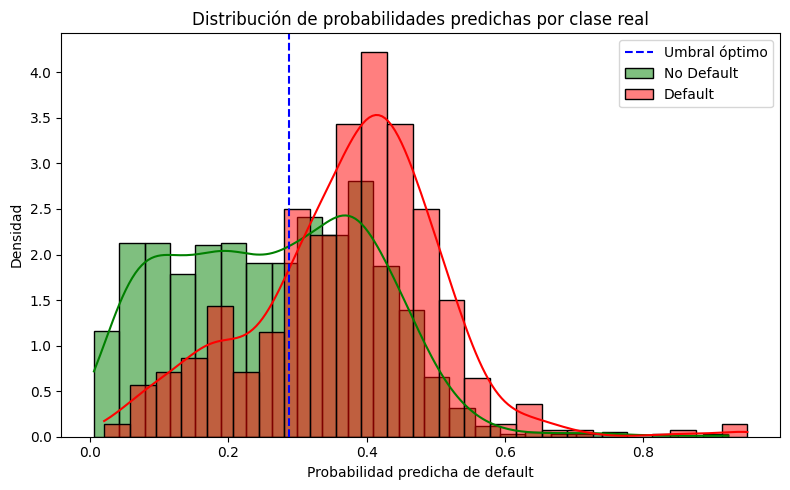

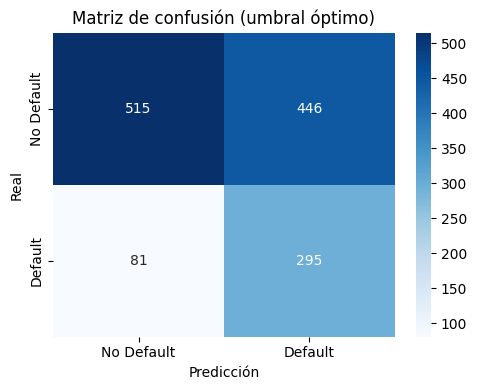

In [29]:
# Importancia de variables
coefs = logreg.coef_[0]
feature_importance = pd.DataFrame({'Variable': features, 'Importancia (coeficiente)': coefs})
feature_importance = feature_importance.sort_values(by='Importancia (coeficiente)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia (coeficiente)', y='Variable', data=feature_importance, palette='viridis')
plt.title('Importancia de las variables en el modelo logístico')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()
print(feature_importance)

# Distribución de probabilidades predichas
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_proba[y_test == 0], color='green', label='No Default', kde=True, stat='density', bins=25)
sns.histplot(y_pred_proba[y_test == 1], color='red', label='Default', kde=True, stat='density', bins=25)
plt.axvline(optimal_threshold, color='blue', linestyle='--', label='Umbral óptimo')
plt.title('Distribución de probabilidades predichas por clase real')
plt.xlabel('Probabilidad predicha de default')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (umbral óptimo)')
plt.tight_layout()
plt.show()